## Exercise


In [47]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("data.csv")

In [41]:
data['order_count'] = data.groupby('customer_id')['customer_id'].transform('count')
data.drop_duplicates(subset='customer_id', keep='last', inplace=True)
data.head()

,customer_id,gender,date,value,predicted_gender,order_count
0,1000,0,2017-01-01 00:11:31,198.5,1,1
1,1001,0,2017-01-01 00:29:56,338.0,1,1
4,1004,0,2017-01-01 03:11:54,508.0,1,1
7,1007,0,2017-01-01 15:59:50,168.0,0,1
9,1009,1,2017-01-01 19:27:17,283.0,1,1


### A) Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)
   Sort the dataframe by customer_id ascending and display the first 10 rows.


In [42]:
df = data[['customer_id','gender','date','order_count']]
df.sort_values(by = 'customer_id')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m/%d/%Y')
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)
#Find most recent date by customer id


#Get number of orders placed per customer



#sort the dataframe by customer id


#Add the order count to the dataframe


df.head(10)
#Top 10 rows 

,customer_id,gender,order_count
date,,,
2017-01-01,1000,0,1
2017-01-01,1001,0,1
2017-01-01,1004,0,1
2017-01-01,1007,0,1
2017-01-01,1009,1,1
2017-01-01,1011,1,1
2017-01-01,1012,1,1
2017-01-01,1013,0,1
2017-01-02,1014,1,1


### B) Plot the count of orders per week.

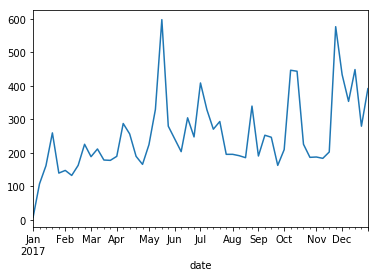

In [43]:
df['order_count'].resample('W').sum().plot()

### C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? 
Hint: use approptiate test to find out the difference is significant or not.

In [48]:
values_0 = data[data.gender == 0].value
values_1 = data[data.gender == 1].value

In [49]:
values_0.mean()

363.89000591803506

In [50]:
values_1.mean()

350.70836114422

In [38]:
from scipy import stats

In [39]:
stats.ttest_ind(values_0, values_1)

Ttest_indResult(statistic=1.9757691572170935, pvalue=0.04820130539124317)